In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append("../src")

In [2]:
NB15_1=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_1.csv')
NB15_2=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_2.csv')
NB15_3=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_3.csv')
NB15_4=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_4.csv')

features=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\NUSW-NB15_features.csv',encoding='latin1')

C:\Users\hp\AppData\Local\Temp\ipykernel_29312\1995450216.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_1.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_29312\1995450216.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_2.csv')


In [3]:
NB15_1.columns = features['Name'] 
NB15_2.columns = features['Name'] 
NB15_3.columns = features['Name'] 
NB15_4.columns = features['Name'] 

In [4]:
df=pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [5]:
df.head(5000)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,59.166.0.6,6064,149.171.126.3,5190,tcp,FIN,0.297797,1470,1728,31,...,0,9,1,1,9,2,1,1,NaN,0
4996,59.166.0.1,58138,149.171.126.7,80,tcp,FIN,1.130813,1684,10168,31,...,0,1,2,2,1,1,1,1,NaN,0
4997,59.166.0.7,47259,149.171.126.2,5190,tcp,FIN,0.175880,1470,1728,31,...,0,6,4,1,1,1,1,1,NaN,0
4998,59.166.0.5,44523,149.171.126.8,5190,tcp,FIN,0.345939,1470,1728,31,...,0,2,7,2,1,1,1,1,NaN,0


In [6]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.00
sport,0,0.00
dstip,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00


In [7]:
df['attack_cat'].fillna('normal',inplace = True)
df['attack_cat'] = df['attack_cat'].apply(lambda x: x.strip().lower())

C:\Users\hp\AppData\Local\Temp\ipykernel_29312\2734310752.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['attack_cat'].fillna('normal',inplace = True)


In [8]:
df['ct_flw_http_mthd'].fillna(0, inplace=True)
df['is_ftp_login'].fillna(0, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_29312\3660552317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ct_flw_http_mthd'].fillna(0, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_29312\3660552317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [9]:
#checking for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

40

C:\Users\hp\AppData\Local\Temp\ipykernel_29312\3571736370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='coolwarm', ax=ax)


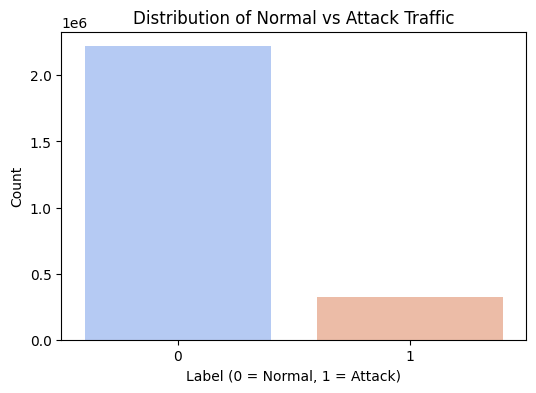

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Label', data=df, palette='coolwarm', ax=ax)
ax.set_title("Distribution of Normal vs Attack Traffic")
ax.set_xlabel("Label (0 = Normal, 1 = Attack)")
ax.set_ylabel("Count")

plt.savefig(r"C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\outputs\figures\class_distribution.png",dpi=300)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_29312\3282280907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette='mako', ax=ax)


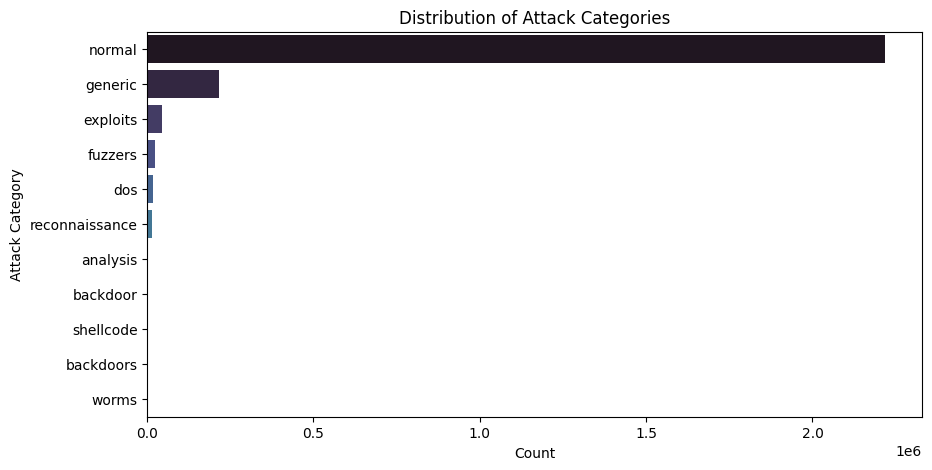

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette='mako', ax=ax)
ax.set_title("Distribution of Attack Categories")
ax.set_xlabel("Count")
ax.set_ylabel("Attack Category")

plt.savefig(r"C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\outputs\figures\attack_categories.png",dpi=300)
plt.show()

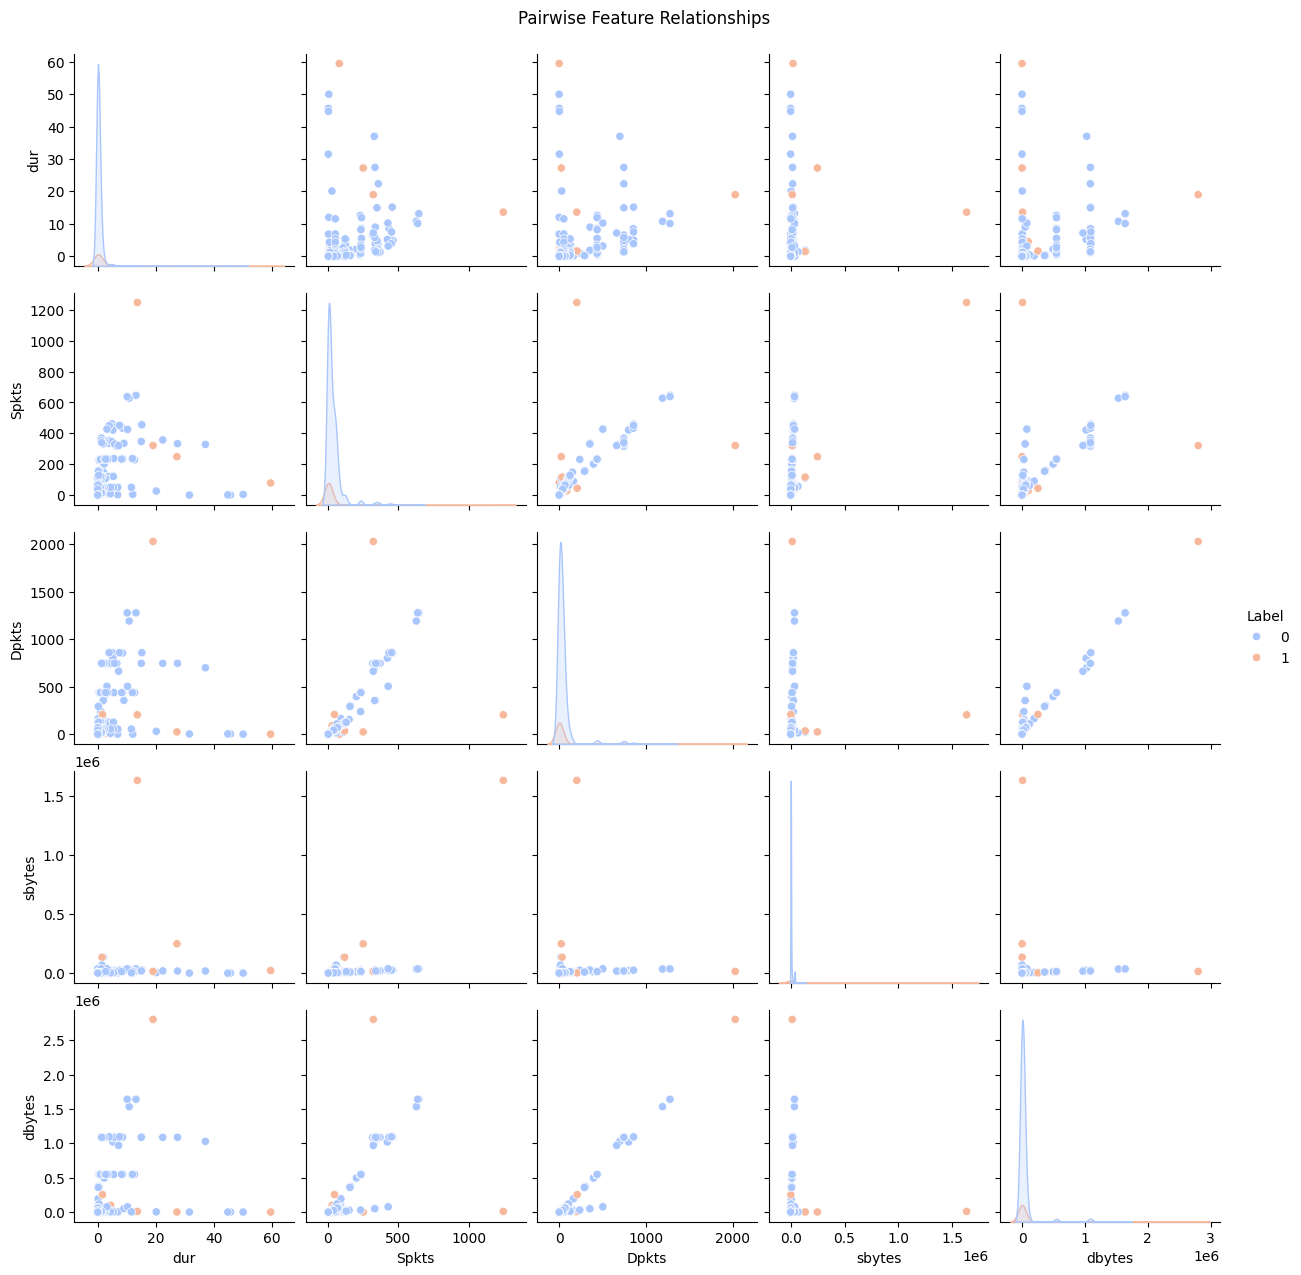

In [13]:
# --- Example continuous features ---
num_features = ['dur', 'Spkts', 'Dpkts', 'sbytes', 'dbytes']

# Pairplot of numeric features vs label
sns.pairplot(df.sample(2000), vars=num_features, hue='Label', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


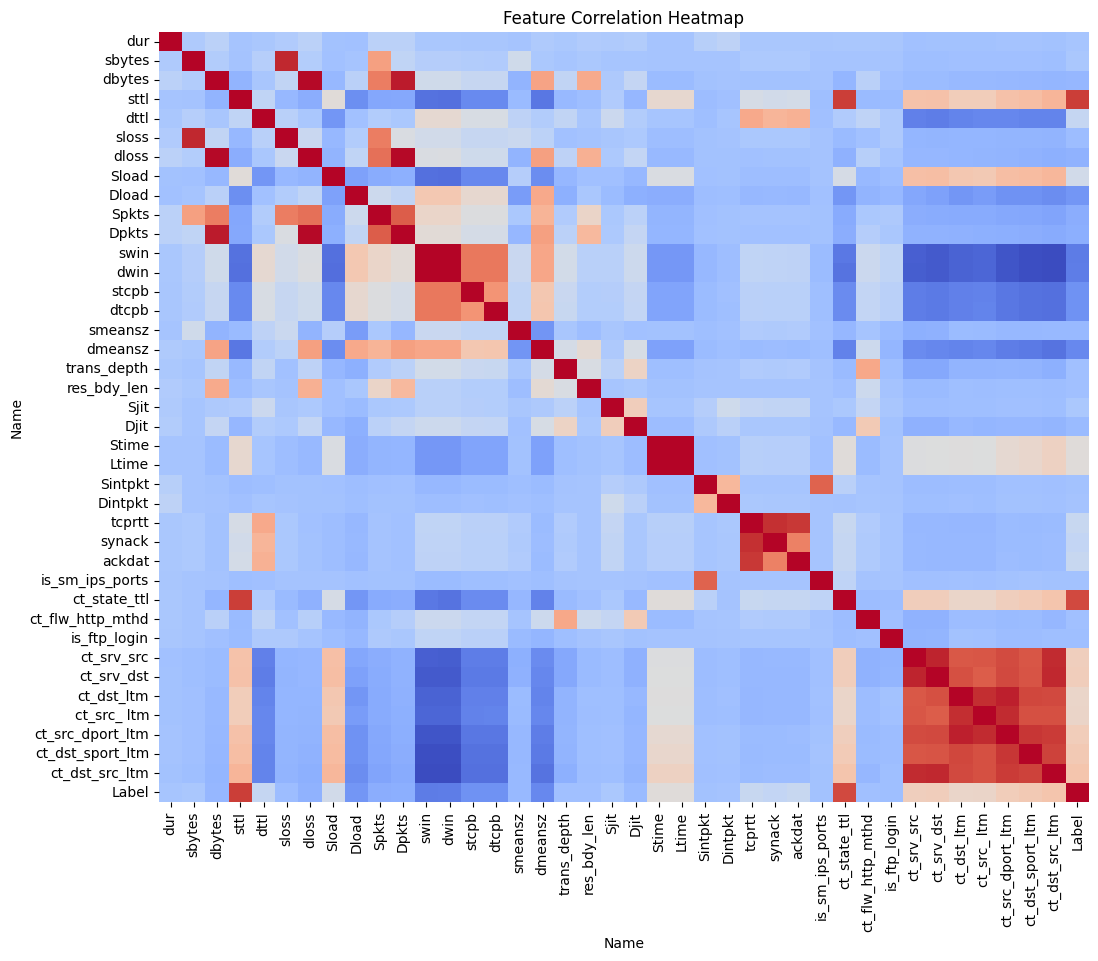

Highly correlated feature pairs (|r| > 0.9): 36


In [14]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', cbar=False, ax=ax)
ax.set_title("Feature Correlation Heatmap")

plt.savefig(r"C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\outputs\figures\correlation_heatmap.png",dpi=300)
plt.show()

high_corr = [(c1, c2, corr.loc[c1, c2]) for c1 in corr.columns for c2 in corr.columns if abs(corr.loc[c1, c2]) > 0.9 and c1 != c2]
print(f"Highly correlated feature pairs (|r| > 0.9): {len(high_corr)}")